## Multiple Linear Regression
#### The purpose of this notebook is to perform multiple linear regression by exploring a dataset with with 6 columns and 25 rows. This is a simple dataset of economic data meant to faciliate practice of multiple linear regression.

In [2]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Load the dataset
df_index = pd.read_csv("economic_index.csv")

# Inspect the first values
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
# Drop the first column, year, and month, which are not needed.
df_index.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
# Check for null or infinite values
print(df_index.isnull().sum())
print(np.isinf(df_index).sum())

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64


### With initial data quality inspected and some basic data clearning finished, visualize the data

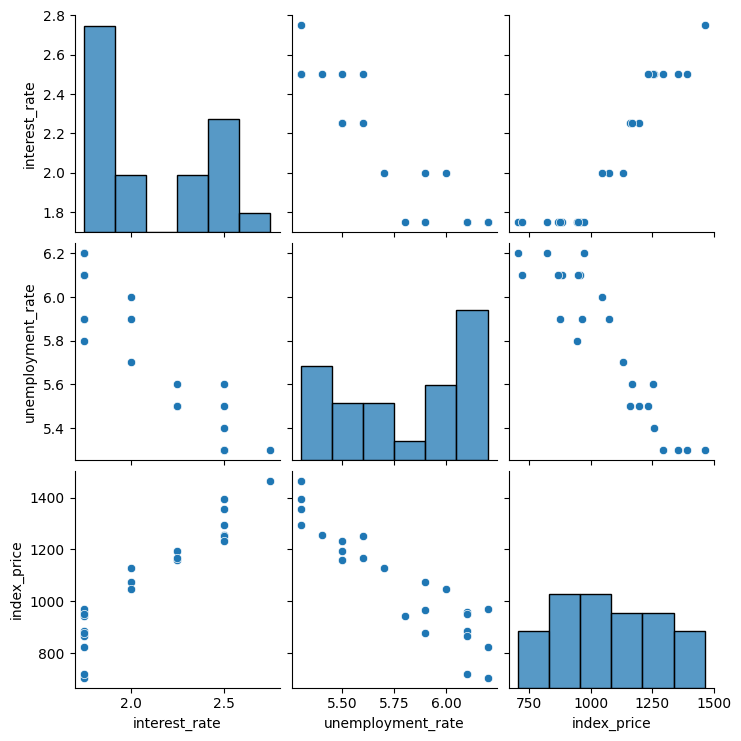

In [7]:
import seaborn as sns
sns.pairplot(df_index)

#### Explore correlation between the variables

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


### Visualize the relationship between interest rates and unemployment rates

Text(0, 0.5, 'Unemployment Rate')

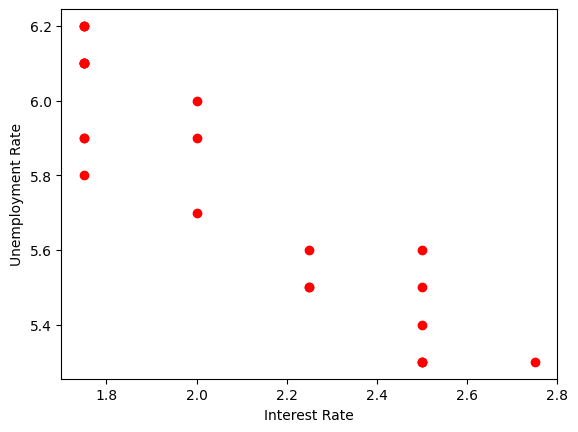

In [9]:
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

#### Identify independent and dependent features

In [10]:
X = df_index.iloc[:, :-1]
y = df_index.iloc[:,-1]

In [11]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [12]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

### Establish Train-Test Split and Visualize the Data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

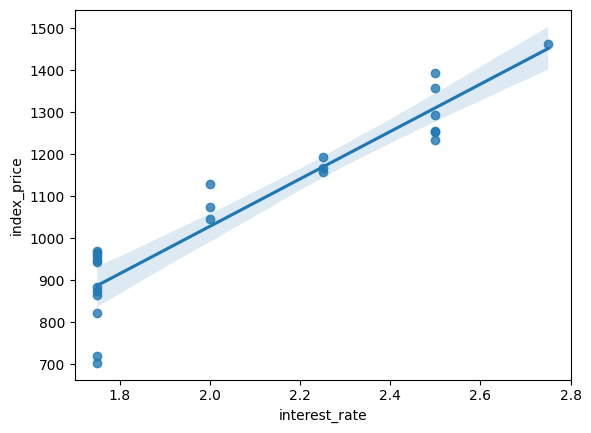

In [15]:
# Plot correlation between index price and interest rate
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

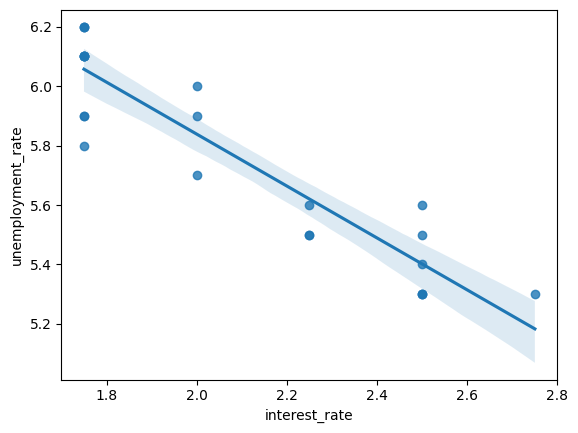

In [16]:
# Plot correlation between interest rate and unemployment
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])

### Normalizing Data for Consistency

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [19]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

### Begin fitting the training data

In [20]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [21]:
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [23]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [24]:
np.mean(validation_score)

np.float64(-5914.828180162386)

### Begin prediction 

In [25]:
## prediction
y_pred=regression.predict(X_test)

In [26]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

### Evaluate the model with performance metrics

In [27]:
# Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [30]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(score)

0.7591371539010257


In [31]:
# Adjusted R^2
print(1 - (1 - score)*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1))

0.5985619231683761


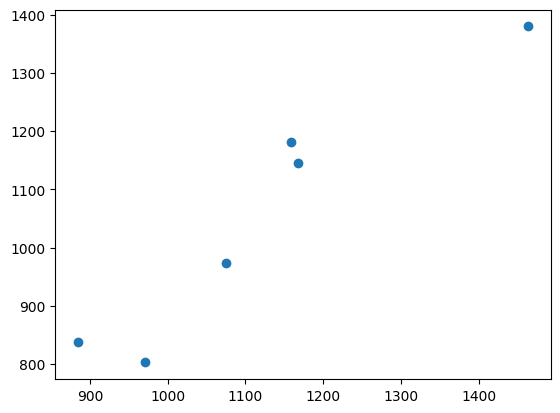

In [32]:
plt.scatter(y_test, y_pred)

In [33]:
residuals = y_test - y_pred

In [34]:
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


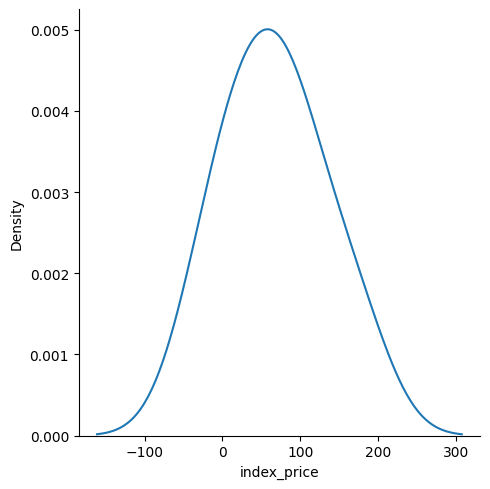

In [35]:
# Plot the residuals
sns.displot(residuals, kind='kde')

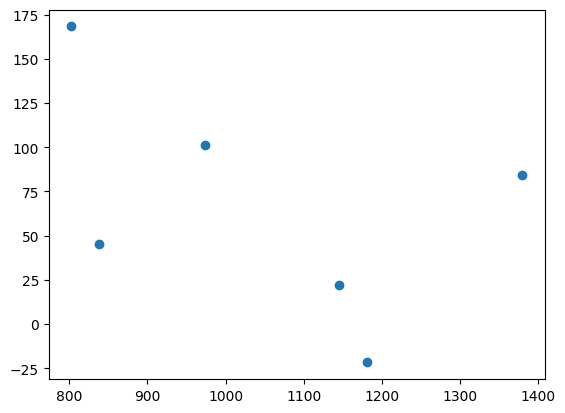

In [36]:
# Create a scatter plot with residuals and predictions
plt.scatter(y_pred, residuals)

In [37]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [38]:
model.summary()

c:\Users\Sam Ben-Yosef\.conda\envs\venv310\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 04 Oct 2024   Prob (F-statistic):                       0.754
Time:                        01:07:58   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
print(regression.coef_)

[  88.27275507 -116.25716066]
